<a href="https://colab.research.google.com/github/kimwonsoon/ai_moon/blob/main/%EA%B2%BD%EB%82%A8%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[ 80 150]
 [ 60 110]
 [ 35 130]
 [160  50]
 [160  20]
 [125  30]]
[ 80  60  35 160 160 125]
[150 110 130  50  20  30]


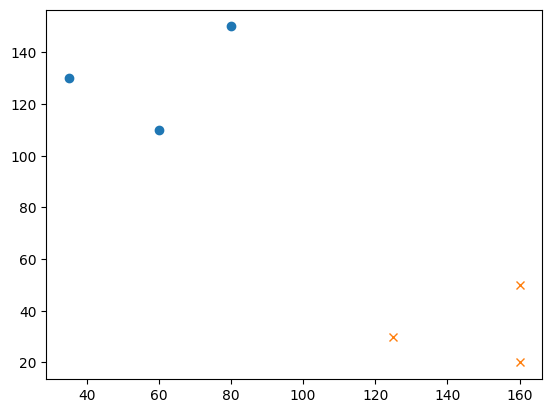

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# input train data​
X = np.array([[80,150], [60,110], [35,130], [160,50], [160,20], [125,30]])  # 폭, 높이​
y = np.array([0,0,0,1,1,1])  # 0: 세로로 긴, 1: 가로로 긴​

print(X)
print(X[:,0])#슬라이싱
print(X[:,1])

# plot input X​
plt.plot(X[:3,0], X[:3,1], 'o')
plt.plot(X[3:,0], X[3:,1], 'x')
plt.show()

In [2]:
# z-score​
z_score = StandardScaler()
X_scaled = z_score.fit_transform(X)
print(X_scaled)

[[-0.48333368  1.35393928]
 [-0.89761968  0.56138946]
 [-1.41547719  0.95766437]
 [ 1.17381036 -0.62743528]
 [ 1.17381036 -1.22184765]
 [ 0.44880984 -1.02371019]]


In [3]:
# LDA model 2-class​
model = LinearDiscriminantAnalysis().fit(X_scaled,y)
print(model)

LinearDiscriminantAnalysis()


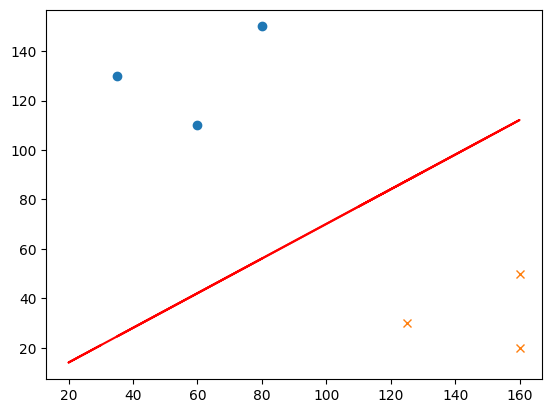

In [4]:
# Plot the hyperplanes​
plt.plot(X[:3,0], X[:3,1], 'o')# 세로로 긴사각형
plt.plot(X[3:,0], X[3:,1], 'x')# 가로로 긴 사각형
y_hyperplane = -1*(model.intercept_[0]+X*model.coef_[0][0])/model.coef_[0][1]
plt.plot(X,y_hyperplane,'r-')

In [5]:
#  prediction
y_hat = model.predict(X)

# input test data​
X_test = np.array([[70,120], [150,40]])  # 폭, 높이​
y_test = np.array([0,1])  # 1: 세로로 긴, 2: 가로로 긴​

# prediction  ​
y_test_hat = model.predict(X_test)

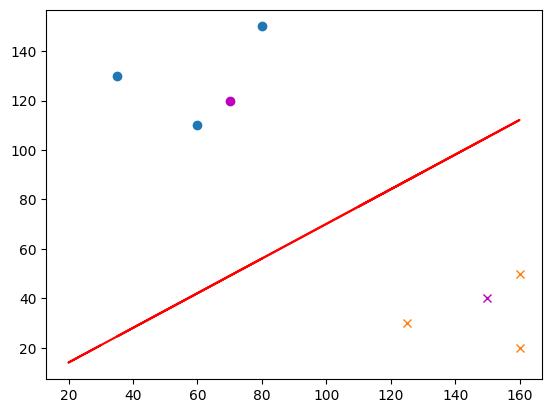

In [6]:
# Plot the hyperplanes​
plt.plot(X[:3,0], X[:3,1], 'o')
plt.plot(X[3:,0], X[3:,1], 'x')
plt.plot(X_test[:1,0], X_test[:1,1], 'om')
plt.plot(X_test[1:,0], X_test[1:,1], 'xm')
y_hyperplane = -1*(model.intercept_[0]+X*model.coef_[0][0])/model.coef_[0][1]
plt.plot(X,y_hyperplane,'r-')

In [7]:
from sklearn.metrics import classification_report
print(classification_report(y, y_hat))
print(classification_report(y_test, y_test_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [9]:
 #로지스틱 회귀 모형
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# input train data​
X = np.array([[80,150], [60,110], [35,130], [160,50], [160,20], [125,30]])  # 폭, 높이​
y = np.array([0,0,0,1,1,1])  # 0: 세로로 긴, 1: 가로로 긴​

# z-score​
z_score = StandardScaler()
X_scaled = z_score.fit_transform(X)

# train model​
model = LogisticRegression()
model.fit(X_scaled, y)

# predict​
y_hat = model.predict(X_scaled)

# validation
from sklearn.metrics import classification_report
print(classification_report(y, y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [10]:
# 텍스트 분류

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# input train data​
X = np.array([[1,1,1,0,0,0,0], [0,0,0,1,0,0,0], [1,0,0,0,1,1,1]])  # [안녕, 과제, 제출, 친구, 하와이, 여행, 당첨]
y = np.array([0,1,1])  # 0: 스팸아님, 1: 스팸

# train model​
model = LogisticRegression()
model.fit(X, y)

# predict​
y_hat = model.predict(X)

# validation
from sklearn.metrics import classification_report
print(classification_report(y, y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



(1797, 64)


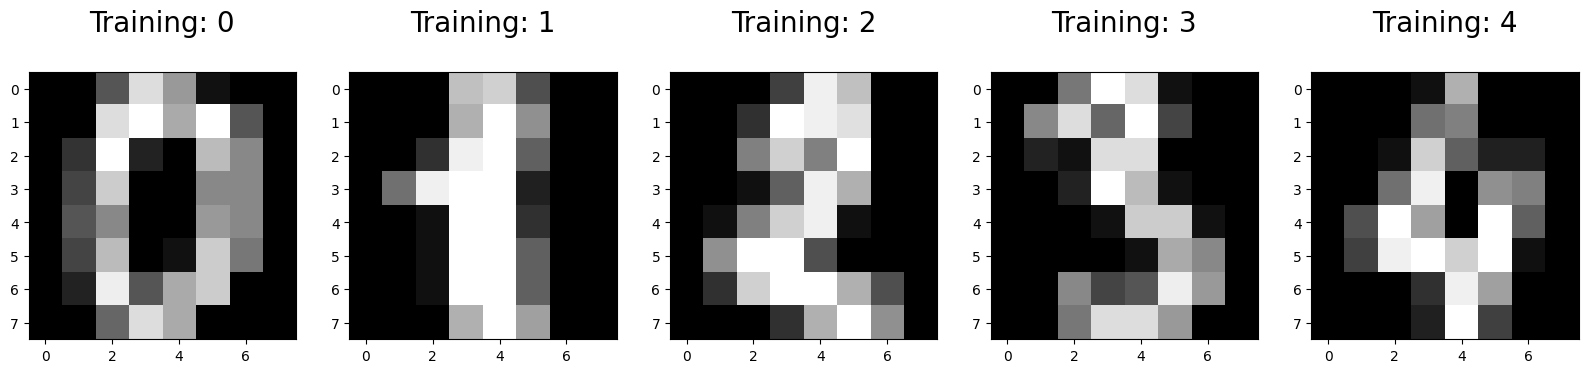

In [11]:
import matplotlib.pyplot as plt
from sklearn import datasets
digits = datasets.load_digits()
print(digits.data.shape)

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.25, random_state=0)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1347, 64) (1347,)
(450, 64) (450,)


In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# train model
model.fit(x_train, y_train)

# predict
y_train_hat = model.predict(x_train)

# validation
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       139
           2       1.00      1.00      1.00       133
           3       1.00      1.00      1.00       138
           4       1.00      1.00      1.00       143
           5       1.00      1.00      1.00       134
           6       1.00      1.00      1.00       129
           7       1.00      1.00      1.00       131
           8       1.00      1.00      1.00       126
           9       1.00      1.00      1.00       133

    accuracy                           1.00      1347
   macro avg       1.00      1.00      1.00      1347
weighted avg       1.00      1.00      1.00      1347



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
